# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Read Dataset

In [3]:
df = pd.read_csv('../data/processed/integrated_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Round,Day,Result,HPoss,HDays,ADays,HxG,AxG
0,2012-08-18,arsenal,sunderland,0,0,0,0,D,C Foy,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.50,8.50,1,Sat,D,NaN,10,10,NaN,NaN
1,2012-08-18,fulham,norwich,5,0,2,0,H,M Oliver,11,4,9,2,12,11,6,3,0,0,0,0,1.80,3.60,4.50,1,Sat,W,NaN,10,10,NaN,NaN
2,2012-08-18,newcastle,tottenham,2,1,0,0,D,M Atkinson,6,12,4,6,12,8,3,5,2,2,0,0,2.50,3.40,2.75,1,Sat,W,NaN,10,10,NaN,NaN
3,2012-08-18,qpr,swansea,0,5,0,1,A,L Probert,20,12,11,8,11,14,5,3,2,2,0,0,2.00,3.40,3.80,1,Sat,L,NaN,10,10,NaN,NaN
4,2012-08-18,reading,stoke,1,1,0,1,A,K Friend,9,6,3,3,9,14,4,3,2,4,0,1,2.38,3.25,3.10,1,Sat,D,NaN,10,10,NaN,NaN


In [4]:
df.shape

(3800, 32)

# 3. Exploratory Data Analysis

## 3.1 Dataset Overview

Firstly, we will try to gain an overview of the dataset that we will be working with.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3800 non-null   object 
 1   HomeTeam  3800 non-null   object 
 2   AwayTeam  3800 non-null   object 
 3   FTHG      3800 non-null   int64  
 4   FTAG      3800 non-null   int64  
 5   HTHG      3800 non-null   int64  
 6   HTAG      3800 non-null   int64  
 7   HTR       3800 non-null   object 
 8   Referee   3800 non-null   object 
 9   HS        3800 non-null   int64  
 10  AS        3800 non-null   int64  
 11  HST       3800 non-null   int64  
 12  AST       3800 non-null   int64  
 13  HF        3800 non-null   int64  
 14  AF        3800 non-null   int64  
 15  HC        3800 non-null   int64  
 16  AC        3800 non-null   int64  
 17  HY        3800 non-null   int64  
 18  AY        3800 non-null   int64  
 19  HR        3800 non-null   int64  
 20  AR        3800 non-null   int6

From the output above, we can see that each variable seems to have suitable data type. We can also see that the column HPoss has 760 null values, while both the columns HxG and AxG has 1900 null values. This already tells us that these three columns are not suitable to be used as features.

In [6]:
df = df.drop(['HPoss', 'HxG', 'AxG'], axis=1)

## 3.2 Descriptive Measures of Data

For each numerical column, we will try to gain an intuition regarding the descriptive measures of it.

In [7]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Round,HDays,ADays
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.517632,1.218947,0.678947,0.545263,13.976579,11.357895,5.034737,4.150000,10.524474,10.876053,5.845789,4.727105,1.527368,1.723684,0.055000,0.075526,2.925095,4.198047,4.904376,19.500000,6.019211,6.056579
std,1.307320,1.189123,0.842463,0.756861,5.638652,4.880765,2.933294,2.522471,3.394238,3.562055,3.097249,2.699771,1.213154,1.255875,0.237066,0.274053,2.168801,1.353576,4.298677,10.967299,2.436646,2.428273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.800000,1.120000,1.000000,2.000000,2.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.660000,3.400000,2.300000,10.000000,4.000000,4.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,10.000000,11.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.250000,3.700000,3.400000,19.500000,6.000000,6.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,7.000000,6.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,3.250000,4.347500,5.500000,29.000000,7.000000,8.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,20.000000,20.000000,24.000000,26.000000,19.000000,17.000000,7.000000,9.000000,2.000000,2.000000,23.000000,17.000000,41.000000,38.000000,10.000000,10.000000


From the table, it is easy to see that the home team tends to perform better than the away team during a match for the most part.

In [8]:
# use boxplots to visualize outliers
# sns.boxplot(x='price',y='num_of_doors',data=auto)

## 3.3 Visualize Correlations

In football, the higher the goals you score in a match, the higher the chance you have of winning the match. In this section, we are interested in identifying the variables that are most influential in determining the number of goals scored. Specifically, we will ask ourselves these two questions:

- **Which Home-Team-related-variables correlates most to FTHG?**

- **Which Away-Team-related-variables correlates most to ATHG?**

In [9]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A', 'Round', 'Day', 'Result',
       'HDays', 'ADays'],
      dtype='object')

In [10]:
ht_df = df[['Date', 'HomeTeam', 'FTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'HDays']]
at_df = df[['Date', 'AwayTeam', 'FTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'ADays']]

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\334724198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ht_df.corr('spearman'),cbar=True,annot=True)


<AxesSubplot:>

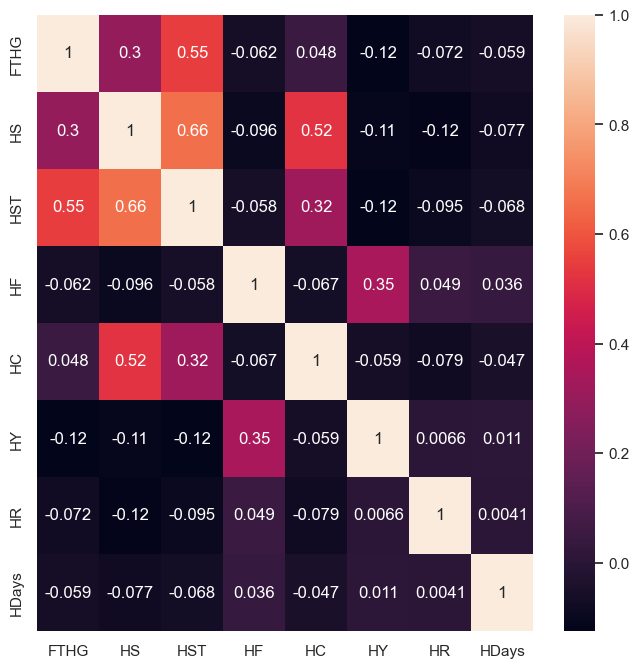

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(ht_df.corr('spearman'),cbar=True,annot=True)

**Which Home-Team-related-variables correlates most to FTHG (Goals Scored by Home Team) ?**

Both the HS (Number of Shots for Home Team) and HST (Number of Shots on Target for Home Team) have relatively high correlation to FTHG. This suggests that HS and HST can be a useful predictor for the outcome of a football match.

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1793671813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(at_df.corr('spearman'),cbar=True,annot=True)


<AxesSubplot:>

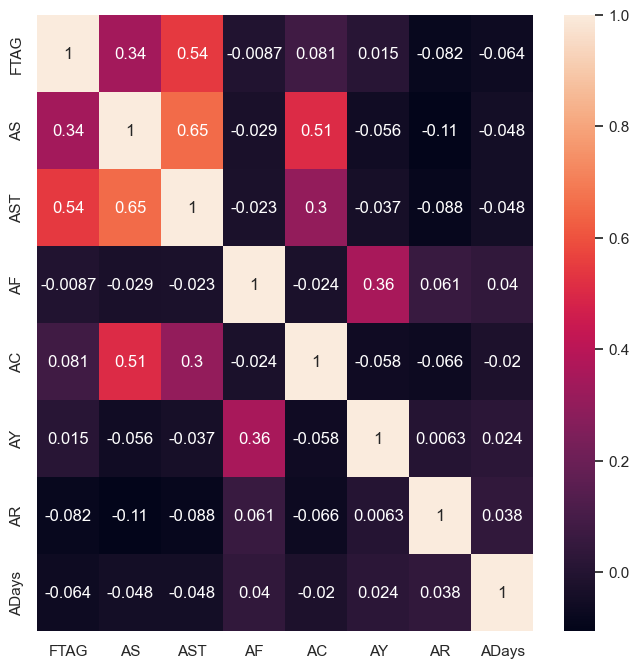

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(at_df.corr('spearman'),cbar=True,annot=True)

**Which Away-Team-related-variables correlates most to ATHG?**

Both the AS (Number of Shots for Away Team) and AST (Number of Shots on Target for Away Team) have relatively high correlation to FTAG. This suggests that AS and AST can be a useful predictor for the outcome of a football match.

## 3.4 Relationships between Variables

### 3.4.1 How does the number of shots affect the outcome of the match?

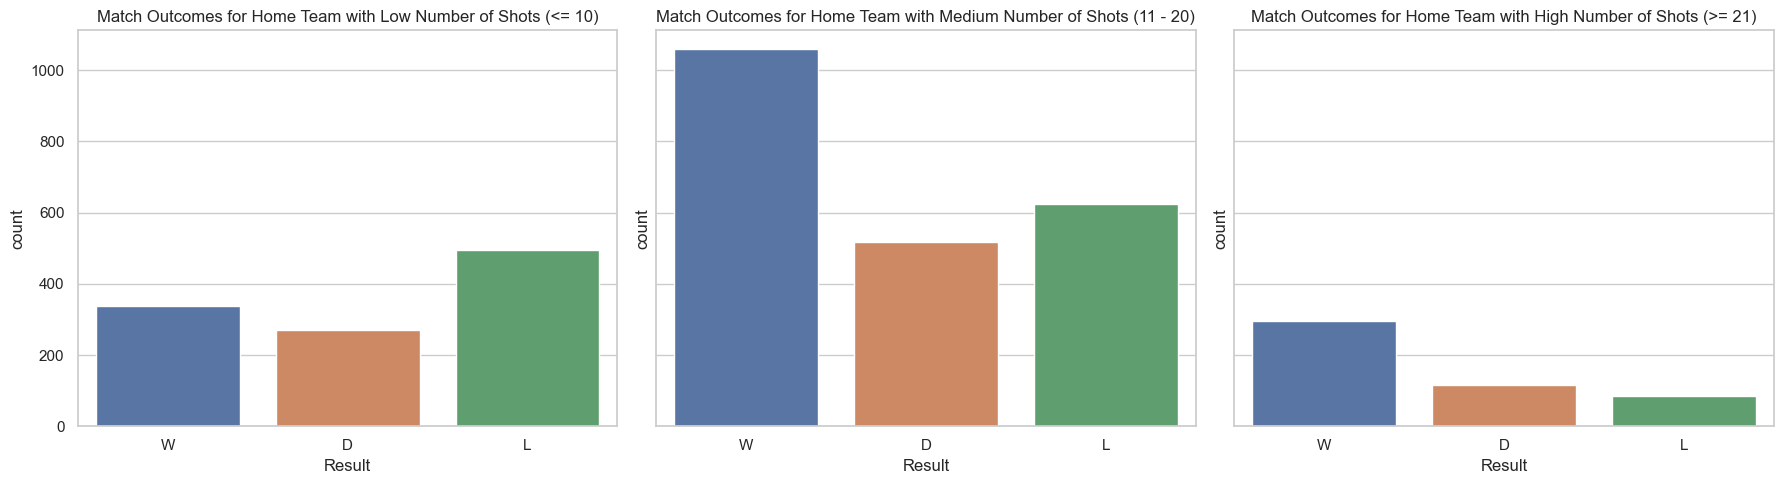

In [13]:
lowAmountOfShots_df = df[(df['HS'] <= 10)]
mediumAmountOfShots_df = df[(df['HS'] >= 11) & (df['HS'] <= 20)]
highAmountOfShots_df = df[(df['HS'] >= 21)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[0].set_title('Match Outcomes for Home Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[1].set_title('Match Outcomes for Home Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[2].set_title('Match Outcomes for Home Team with High Number of Shots (>= 21)')

plt.tight_layout()

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\711522923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\711522923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\711522923.py:7: Setti

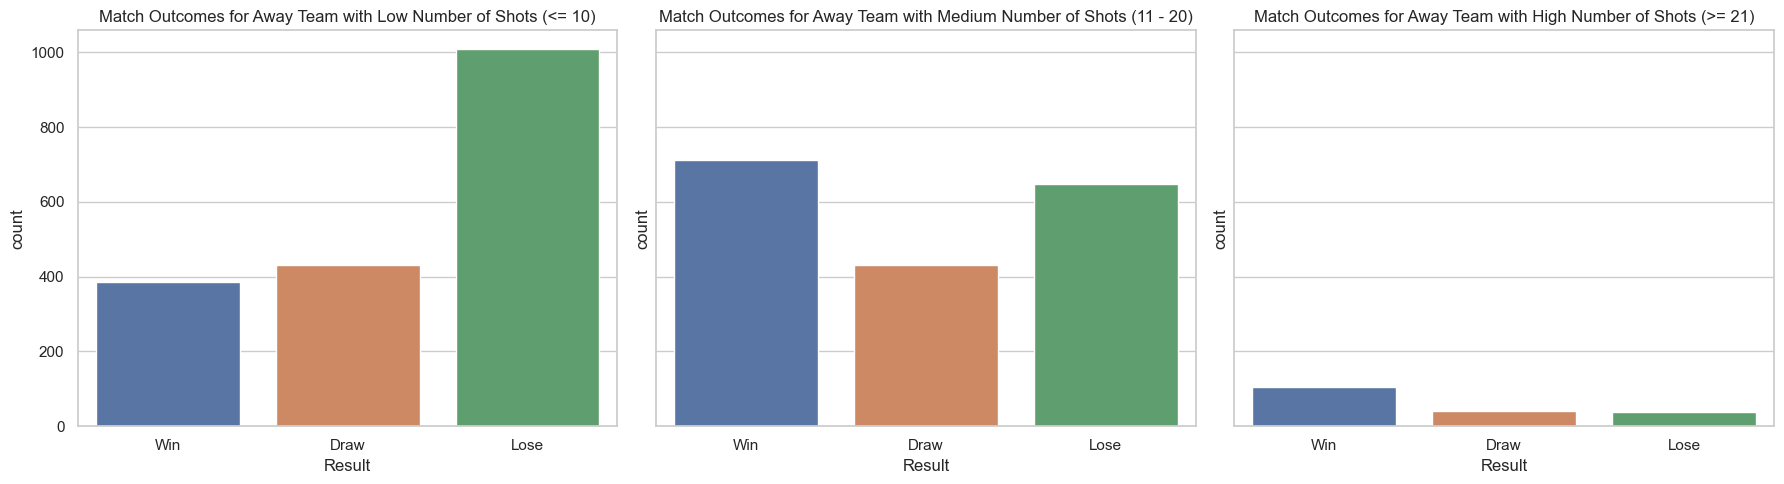

In [14]:
lowAmountOfShots_df = df[(df['AS'] <= 10)]
mediumAmountOfShots_df = df[(df['AS'] >= 11) & (df['AS'] <= 20)]
highAmountOfShots_df = df[(df['AS'] >= 21)]

lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
highAmountOfShots_df['Result'] = highAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[0].set_title('Match Outcomes for Away Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[1].set_title('Match Outcomes for Away Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[2].set_title('Match Outcomes for Away Team with High Number of Shots (>= 21)')

plt.tight_layout()

Compare percentages of win% in first plot and last plot. Describe how you do binning.

### 3.4.2 How does the number of shots on target affect the outcome of the match?

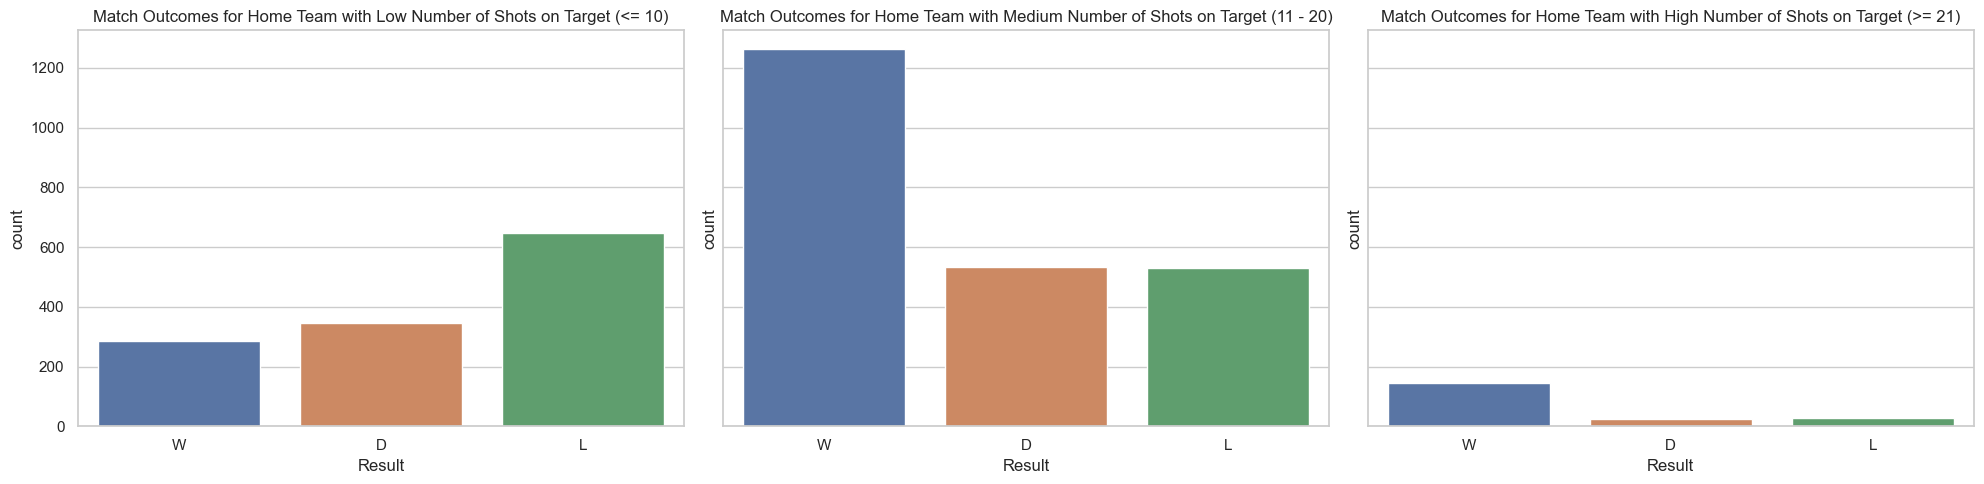

In [15]:
lowAmountOfShots_df = df[(df['HST'] <= 3)]
mediumAmountOfShots_df = df[(df['HST'] >= 4) & (df['HST'] <= 10)]
highAmountOfShots_df = df[(df['HST'] >= 11)]

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[0].set_title('Match Outcomes for Home Team with Low Number of Shots on Target (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[1].set_title('Match Outcomes for Home Team with Medium Number of Shots on Target (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[2].set_title('Match Outcomes for Home Team with High Number of Shots on Target (>= 21)')

plt.tight_layout()

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2075144645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2075144645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2075144645.py:7: Se

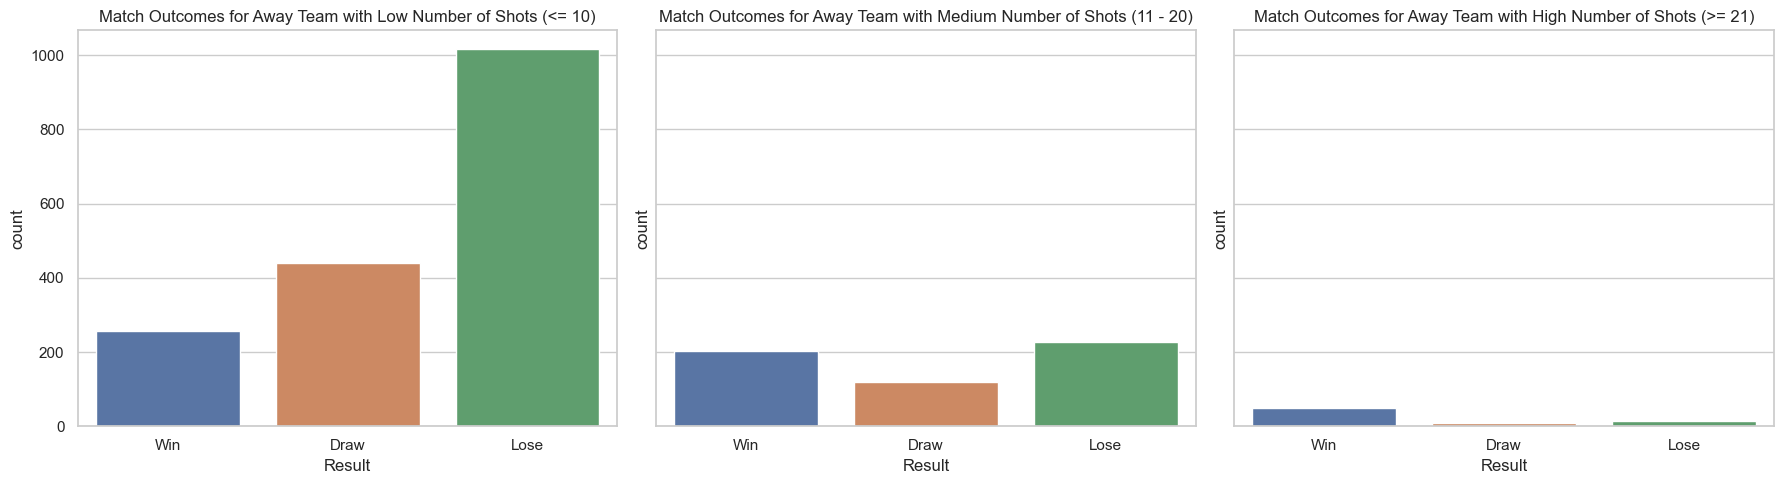

In [16]:
lowAmountOfShots_df = df[(df['AST'] <= 3)]
mediumAmountOfShots_df = df[(df['AST'] >= 4) & (df['AS'] <= 10)]
highAmountOfShots_df = df[(df['AST'] >= 11)]

lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
highAmountOfShots_df['Result'] = highAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[0].set_title('Match Outcomes for Away Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[1].set_title('Match Outcomes for Away Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[2].set_title('Match Outcomes for Away Team with High Number of Shots (>= 21)')

plt.tight_layout()

Compare percentages of win% in first plot and last plot. Describe how you do binning.

### 3.4.3 What is the relationship between betting odds and the match outcome?

In [17]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Round,Day,Result,HDays,ADays
0,2012-08-18,arsenal,sunderland,0,0,0,0,D,C Foy,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.50,8.50,1,Sat,D,10,10
1,2012-08-18,fulham,norwich,5,0,2,0,H,M Oliver,11,4,9,2,12,11,6,3,0,0,0,0,1.80,3.60,4.50,1,Sat,W,10,10
2,2012-08-18,newcastle,tottenham,2,1,0,0,D,M Atkinson,6,12,4,6,12,8,3,5,2,2,0,0,2.50,3.40,2.75,1,Sat,W,10,10
3,2012-08-18,qpr,swansea,0,5,0,1,A,L Probert,20,12,11,8,11,14,5,3,2,2,0,0,2.00,3.40,3.80,1,Sat,L,10,10
4,2012-08-18,reading,stoke,1,1,0,1,A,K Friend,9,6,3,3,9,14,4,3,2,4,0,1,2.38,3.25,3.10,1,Sat,D,10,10


In [18]:
def getB365Pred(row):
    cols = ['B365H', 'B365D', 'B365A']
    
    lowest = 'B365H'
    for c in cols:
        if row[c] < row[lowest]:
            lowest = c
    
    if lowest[-1] == 'H':
        return 'W'
    elif lowest[-1] == 'A':
        return 'L'
    else:
        return 'D'

df['B365 Prediction'] = df.apply(getB365Pred, axis=1)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Round,Day,Result,HDays,ADays,B365 Prediction
0,2012-08-18,arsenal,sunderland,0,0,0,0,D,C Foy,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.50,8.50,1,Sat,D,10,10,W
1,2012-08-18,fulham,norwich,5,0,2,0,H,M Oliver,11,4,9,2,12,11,6,3,0,0,0,0,1.80,3.60,4.50,1,Sat,W,10,10,W
2,2012-08-18,newcastle,tottenham,2,1,0,0,D,M Atkinson,6,12,4,6,12,8,3,5,2,2,0,0,2.50,3.40,2.75,1,Sat,W,10,10,W
3,2012-08-18,qpr,swansea,0,5,0,1,A,L Probert,20,12,11,8,11,14,5,3,2,2,0,0,2.00,3.40,3.80,1,Sat,L,10,10,W
4,2012-08-18,reading,stoke,1,1,0,1,A,K Friend,9,6,3,3,9,14,4,3,2,4,0,1,2.38,3.25,3.10,1,Sat,D,10,10,W


In [19]:
df['B365 Prediction'].unique()

array(['W', 'L'], dtype=object)

In [20]:
from sklearn import metrics

# confusion_matrix = metrics.confusion_matrix(df['Result'].tolist(), df['B365 Prediction'].tolist())
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

actual = df['Result'].tolist()
predicted = df['B365 Prediction'].tolist()

metrics.confusion_matrix(actual, predicted, labels=['W', 'D', 'L'])

array([[1409,    0,  285],
       [ 617,    0,  286],
       [ 514,    0,  689]], dtype=int64)

In [21]:
df.drop('B365 Prediction', axis=1, inplace=True)

# 4. Feature Engineering

In [22]:
# Global variables for Feature Engineering
number_of_previous_matches = 10

In [23]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Round,Day,Result,HDays,ADays
0,2012-08-18,arsenal,sunderland,0,0,0,0,D,C Foy,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.50,8.50,1,Sat,D,10,10
1,2012-08-18,fulham,norwich,5,0,2,0,H,M Oliver,11,4,9,2,12,11,6,3,0,0,0,0,1.80,3.60,4.50,1,Sat,W,10,10
2,2012-08-18,newcastle,tottenham,2,1,0,0,D,M Atkinson,6,12,4,6,12,8,3,5,2,2,0,0,2.50,3.40,2.75,1,Sat,W,10,10
3,2012-08-18,qpr,swansea,0,5,0,1,A,L Probert,20,12,11,8,11,14,5,3,2,2,0,0,2.00,3.40,3.80,1,Sat,L,10,10
4,2012-08-18,reading,stoke,1,1,0,1,A,K Friend,9,6,3,3,9,14,4,3,2,4,0,1,2.38,3.25,3.10,1,Sat,D,10,10


In [24]:
df.isna().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
Round       0
Day         0
Result      0
HDays       0
ADays       0
dtype: int64

## 4.1 Home Team Form

### HASLxM- Average Shots by Home Team in the Last x Matches

In [25]:
def getShots(row, team):
    if row['HomeTeam'] == team:
        return row['HS']
    else:
        return row['AS']

In [26]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots'] = team_df.apply(lambda row: getShots(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots'].shift(i)
    
    team_df['HASLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [27]:
# df.head(10)

In [28]:
df.shape

(3800, 30)

### HASTLxM- Average Shots on Target by Home Team in the Last x Matches

In [29]:
def getShotsOnTarget(row, team):
    if row['HomeTeam'] == team:
        return row['HST']
    else:
        return row['AST']

In [30]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots on Target'] = team_df.apply(lambda row: getShotsOnTarget(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots on Target'].shift(i)
    
    team_df['HASTLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots on Target'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [31]:
# df.head(10)

In [32]:
df.shape

(3800, 31)

### HACLxM- Average Corners by Home Team in the Last x Matches

In [33]:
def getCorners(row, team):
    if row['HomeTeam'] == team:
        return row['HC']
    else:
        return row['AC']

In [34]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Corners'] = team_df.apply(lambda row: getCorners(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Corners'].shift(i)
    
    team_df['HACLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Corners'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [35]:
# df.head()

In [36]:
df.shape

(3800, 32)

### HAFLxM- Average Fouls by Home Team in the Last x Matches

In [37]:
def getFouls(row, team):
    if row['HomeTeam'] == team:
        return row['HF']
    else:
        return row['AF']

In [38]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Fouls'] = team_df.apply(lambda row: getFouls(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Fouls'].shift(i)
    
    team_df['HAFLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Fouls'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [39]:
# df.head()

In [40]:
df.shape

(3800, 33)

### HAYCLxM- Average Yellow Cards by Home Team in the Last x Matches

In [41]:
def getYellowCards(row, team):
    if row['HomeTeam'] == team:
        return row['HY']
    else:
        return row['AY']

In [42]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Yellow Cards'] = team_df.apply(lambda row: getYellowCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Yellow Cards'].shift(i)
    
    team_df['HAYCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Yellow Cards'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [43]:
# df.head()

In [44]:
df.shape

(3800, 34)

### HARCLxM- Average Red Cards by Home Team in the Last x Matches

In [45]:
def getRedCards(row, team):
    if row['HomeTeam'] == team:
        return row['HR']
    else:
        return row['AR']

In [46]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Red Cards'] = team_df.apply(lambda row: getRedCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Red Cards'].shift(i)
    
    team_df['HARCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Red Cards'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [47]:
# df.head()

In [48]:
df.shape

(3800, 35)

### HAGSLxM- Average Goals Scored by Home Team in the Last x Matches

In [49]:
def getGoalsScored(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    else:
        return row['FTAG']

In [50]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Scored'] = team_df.apply(lambda row: getGoalsScored(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Scored'].shift(i)
    
    team_df['HAGSLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Scored'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [51]:
# df.head()

In [52]:
df.shape

(3800, 36)

### HAHTGSLxM- Average Half Time Goals Scored by Home Team in the Last x Matches

In [53]:
def getHalfTimeGoalsScored(row, team):
    if row['HomeTeam'] == team:
        return row['HTHG']
    else:
        return row['HTAG']

In [54]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Half Time Goals Scored'] = team_df.apply(lambda row: getHalfTimeGoalsScored(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Half Time Goals Scored'].shift(i)
    
    team_df['HAHTGSLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Half Time Goals Scored'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [55]:
# df.head()

In [56]:
df.shape

(3800, 37)

### HAGCLxM- Average Goals Conceded by Home Team in the Last x Matches

In [57]:
def getGoalsConceded(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    else:
        return row['FTHG']

In [58]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Conceded'] = team_df.apply(lambda row: getGoalsConceded(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Conceded'].shift(i)
    
    team_df['HAGCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Conceded'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [59]:
# df.head()

In [60]:
df.shape

(3800, 38)

### HAHTGCLxM- Average Half Time Goals Conceded by Home Team in the Last x Matches

In [61]:
def getHalfTimeGoalsConceded(row, team):
    if row['HomeTeam'] == team:
        return row['HTAG']
    else:
        return row['HTHG']

In [62]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Half Time Goals Conceded'] = team_df.apply(lambda row: getHalfTimeGoalsConceded(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Half Time Goals Conceded'].shift(i)
    
    team_df['HAHTGCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Half Time Goals Conceded'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [63]:
# df.head()

In [64]:
df.shape

(3800, 39)

### HAGSLxHM- Average Goals Scored by Home Team in the Last x Home Matches

In [65]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTHG'].shift(i)

    team_df['HAGSLxHM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [66]:
# df.head()

In [67]:
df.shape

(3800, 40)

### HAHTGSLxHM- Average Half Time Goals Scored by Home Team in the Last x Home Matches

In [68]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['HTHG'].shift(i)

    team_df['HAHTGSLxHM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [69]:
# df.head()

In [70]:
df.shape

(3800, 41)

### HAGCLxHM- Average Goals Conceded by Home Team in the Last x Home Matches

In [71]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTAG'].shift(i)

    team_df['HAGCLxHM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [72]:
# df.head()

In [73]:
df.shape

(3800, 42)

### HAHTGCLxHM- Average Half Time Goals Conceded by Home Team in the Last x Home Matches

In [74]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['HTAG'].shift(i)

    team_df['HAHTGCLxHM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [75]:
# df.head()

In [76]:
df.shape

(3800, 43)

### HGDLxM- Goals Difference of Home Team in the Last x Matches

In [77]:
def getGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    elif row['AwayTeam'] == team:
        return row['FTAG']

In [78]:
def getGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    elif row['AwayTeam'] == team:
        return row['FTHG']

In [79]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    column1 = 0;
    column2 = 0;
    
    team_df['GoalsScoredByTeam'] = team_df.apply(lambda row: getGoalsScoredByTeam(row, team), axis=1)
    team_df['GoalsScoredByOpponent'] = team_df.apply(lambda row: getGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['GoalsScoredByTeam'].shift(i)
        column2 += team_df['GoalsScoredByOpponent'].shift(i)
    
    team_df['HGDLxM'] = column1 - column2
    team_df.drop(columns=['GoalsScoredByTeam', 'GoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [80]:
# df.head()

In [81]:
df.shape

(3800, 44)

### HHTGDLxM- Half Time Goals Difference of Home Team in the Last x Matches

In [82]:
def getHalfTimeGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['HTHG']
    elif row['AwayTeam'] == team:
        return row['HTAG']

In [83]:
def getHalfTimeGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['HTAG']
    elif row['AwayTeam'] == team:
        return row['HTHG']

In [84]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    column1 = 0;
    column2 = 0;
    
    team_df['HalfTimeGoalsScoredByTeam'] = team_df.apply(lambda row: getHalfTimeGoalsScoredByTeam(row, team), axis=1)
    team_df['HalfTimeGoalsScoredByOpponent'] = team_df.apply(lambda row: getHalfTimeGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['HalfTimeGoalsScoredByTeam'].shift(i)
        column2 += team_df['HalfTimeGoalsScoredByOpponent'].shift(i)
    
    team_df['HHTGDLxM'] = column1 - column2
    team_df.drop(columns=['HalfTimeGoalsScoredByTeam', 'HalfTimeGoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [85]:
# df.head()

In [86]:
df.shape

(3800, 45)

### HGDLxHM- Goals Difference of Home Team in the Last x Home Matches

In [87]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column1 = 0;
    column2 = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['FTHG'].shift(i)
        column2 += team_df['FTAG'].shift(i)

    team_df['HGDLxHM'] = column1 - column2
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [88]:
# df.head(10)

In [89]:
df.shape

(3800, 46)

### HHTGDLxHM- Half Time Goals Difference of Home Team in the Last x Home Matches

In [90]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column1 = 0;
    column2 = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['HTHG'].shift(i)
        column2 += team_df['HTAG'].shift(i)

    team_df['HHTGDLxHM'] = column1 - column2
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [91]:
# df.head(10)

In [92]:
df.shape

(3800, 47)

### HAPLxM- Average Points Gained by Home Team in the Last x Matches

In [93]:
def getPointsGained(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 3
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 0
    else:
        if row['Result'] == 'W':
            return 0
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 3

In [94]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['HAPLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [95]:
# df.head(10)

In [96]:
df.shape

(3800, 48)

### HAPLxHM- Average Points Gained by Home Team in the Last x Home Matches

In [97]:
def getPointsGained(row):
    if row['Result'] == 'W':
        return 3
    elif row['Result'] == 'D':
        return 1
    elif row['Result'] == 'L':
        return 0

In [98]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team)]
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
    column = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['HAPLxHM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be s

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [99]:
# df.head()

In [100]:
df.shape

(3800, 49)

### HWPLxM- Win Percentage of Home Team in the Last x Matches

In [101]:
def getNumberOfWins(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L':
            return 1
        else:
            return 0

In [102]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['HWPLxM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [103]:
# df.head()

In [104]:
df.shape

(3800, 50)

### HWPLxHM- Win Percentage of Home Team in the Last x Home Matches

In [105]:
def getNumberOfWinsAtHome(row):
    if row['Result'] == 'W':
        return 1
    else:
        return 0

In [106]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team)]
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
    column = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['HWPLxHM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1573672323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1573672323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1573672323.py:5: SettingWithCopyWarning: 
A value is 

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1573672323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1573672323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1573672323.py:5: SettingWithCopyWarning: 
A value is 

In [107]:
# df.head()

In [108]:
df.shape

(3800, 51)

### HWinStreak- Home Team Win Streak

In [109]:
def getBooleanWin(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L':
            return 1
        else:
            return 0

In [110]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Win'] = team_df.apply(lambda row: getBooleanWin(row, team), axis=1)
    
    grouper = (team_df['Win'] != team_df['Win'].shift()).cumsum()
    team_df['HWinStreak'] = team_df['Win'].groupby(grouper).cumsum()
    team_df.drop(columns=['Win'], inplace=True)
    team_df['HWinStreak'] = team_df['HWinStreak'].shift(1)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [111]:
# df.tail()

In [112]:
df.shape

(3800, 52)

### HUPLxM- Unbeaten Percentage of Home Team in the Last x Matches

In [113]:
def getNumberOfUnbeaten(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W' or row['Result'] == 'D':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L' or row['Result'] == 'D':
            return 1
        else:
            return 0

In [114]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Number of Unbeatens'] = team_df.apply(lambda row: getNumberOfUnbeaten(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Unbeatens'].shift(i)
    
    team_df['HUPLxM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Unbeatens'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [115]:
# df.head()

In [116]:
df.shape

(3800, 53)

### HUPLxHM- Unbeaten Percentage of Home Team in the Last x Home Matches

In [117]:
def getNumberOfUnbeatenAtHome(row):
    if row['Result'] == 'W' or row['Result'] == 'D':
        return 1
    else:
        return 0

In [118]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team)]
    team_df['Number of Unbeatens'] = team_df.apply(lambda row: getNumberOfUnbeatenAtHome(row), axis=1)
    column = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Unbeatens'].shift(i)
    
    team_df['HUPLxHM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Unbeatens'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2632788272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeatens'] = team_df.apply(lambda row: getNumberOfUnbeatenAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2632788272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeatens'] = team_df.apply(lambda row: getNumberOfUnbeatenAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2632788272.py:5: SettingWithCopyWar

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2632788272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeatens'] = team_df.apply(lambda row: getNumberOfUnbeatenAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2632788272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeatens'] = team_df.apply(lambda row: getNumberOfUnbeatenAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\2632788272.py:5: SettingWithCopyWar

In [119]:
# df.head()

In [120]:
df.shape

(3800, 54)

### HUnbStreak- Home Team Unbeaten Streak

In [121]:
def getBooleanUnbeaten(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W' or row['Result'] == 'D':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L' or row['Result'] == 'D':
            return 1
        else:
            return 0

In [122]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Unbeaten'] = team_df.apply(lambda row: getBooleanUnbeaten(row, team), axis=1)
    
    grouper = (team_df['Unbeaten'] != team_df['Unbeaten'].shift()).cumsum()
    team_df['HUnbStreak'] = team_df['Unbeaten'].groupby(grouper).cumsum()
    team_df.drop(columns=['Unbeaten'], inplace=True)
    team_df['HUnbStreak'] = team_df['HUnbStreak'].shift(1)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [123]:
# df.tail()

team='burnley'
df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].sort_values(by = 'Date').head(50)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Round,Day,Result,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAHTGSLxM,HAGCLxM,HAHTGCLxM,HAGSLxHM,HAHTGSLxHM,HAGCLxHM,HAHTGCLxHM,HGDLxM,HHTGDLxM,HGDLxHM,HHTGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,HUPLxM,HUPLxHM,HUnbStreak
3135,2014-08-18,burnley,chelsea,1,3,1,3,A,M Oliver,9,11,2,3,6,7,4,3,1,1,0,0,9.00,5.00,1.40,1,Mon,L,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2052,2014-08-23,swansea,burnley,1,0,1,0,H,C Pawson,10,12,5,1,14,13,2,3,2,1,0,0,1.65,4.00,6.00,2,Sat,W,7,5,11.0,4.3,4.9,12.3,1.3,0.1,1.8,1.0,1.2,0.4,1.7,0.7,1.2,0.3,6.0,6.0,5.0,4.0,1.6,1.3,50.0,40.0,2.0,60.0,50.0,2.0
3136,2014-08-30,burnley,united,0,0,0,0,D,C Foy,9,7,3,2,10,14,3,6,2,2,0,0,6.00,4.20,1.62,3,Sat,D,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
2737,2014-09-13,palace,burnley,0,0,0,0,D,M Dean,14,11,3,3,12,10,5,5,2,3,0,0,2.25,3.30,3.60,4,Sat,D,10,10,9.8,4.6,4.7,12.9,1.9,0.1,1.8,0.5,1.7,0.7,1.1,0.3,1.2,0.6,1.0,-2.0,-1.0,-3.0,1.5,1.6,40.0,50.0,0.0,70.0,60.0,1.0
3137,2014-09-20,burnley,sunderland,0,0,0,0,D,A Taylor,17,14,6,6,14,14,5,1,1,2,0,0,2.50,3.30,3.10,5,Sat,D,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0
534,2014-09-28,west-brom,burnley,4,0,2,0,H,J Moss,20,10,6,2,7,9,10,2,1,2,0,0,2.00,3.50,4.20,6,Sun,W,4,8,12.5,3.1,6.4,10.3,1.4,0.0,0.6,0.3,1.5,1.1,1.3,0.7,1.8,0.9,-9.0,-8.0,-5.0,-2.0,0.8,0.9,20.0,10.0,1.0,40.0,70.0,1.0
2986,2014-10-04,leicester,burnley,2,2,2,1,H,P Dowd,15,10,6,4,16,12,9,3,2,2,0,0,1.80,3.75,5.00,7,Sat,D,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
3138,2014-10-18,burnley,west-ham,1,3,0,0,D,K Friend,17,22,3,6,3,10,5,7,0,1,0,0,2.80,3.40,2.70,8,Sat,L,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0
3139,2014-10-26,burnley,everton,1,3,1,2,A,A Marriner,14,15,3,6,12,7,5,4,4,2,0,0,4.75,3.75,1.83,9,Sun,L,8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
42,2014-11-01,arsenal,burnley,3,0,0,0,D,C Pawson,32,6,13,2,5,9,18,1,0,1,0,0,1.25,6.50,14.00,10,Sat,W,7,6,15.5,5.2,6.1,9.7,2.4,0.0,1.7,0.7,1.1,0.7,2.1,0.9,1.1,0.6,6.0,0.0,10.0,3.0,1.7,2.0,40.0,50.0,1.0,90.0,100.0,2.0


In [124]:
df.shape

(3800, 55)

## 4.2 Away Team Form

### AASLxM- Average Shots of Away Team in Last x Matches

In [125]:
def getShots(row, team):
    if row['AwayTeam'] == team:
        return row['AS']
    else:
        return row['HS']

In [126]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots'] = team_df.apply(lambda row: getShots(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots'].shift(i)
    
    team_df['AASLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [127]:
# df.head(10)

In [128]:
df.shape

(3800, 56)

### AASTLxM- Average Shots on Target of Away Team in Last x Matches

In [129]:
def getShotsOnTarget(row, team):
    if row['AwayTeam'] == team:
        return row['AST']
    else:
        return row['HST']

In [130]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots on Target'] = team_df.apply(lambda row: getShotsOnTarget(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots on Target'].shift(i)
    
    team_df['AASTLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots on Target'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [131]:
# df.head(10)

In [132]:
df.shape

(3800, 57)

### AACLxM- Average Corners by Away Team in the Last x Matches

In [133]:
def getCorners(row, team):
    if row['AwayTeam'] == team:
        return row['AC']
    else:
        return row['HC']

In [134]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Corners'] = team_df.apply(lambda row: getCorners(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Corners'].shift(i)
    
    team_df['AACLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Corners'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [135]:
# df.head(10)

In [136]:
df.shape

(3800, 58)

### AAFLxM- Average Fouls by Away Team in the Last x Matches

In [137]:
def getFouls(row, team):
    if row['AwayTeam'] == team:
        return row['AF']
    else:
        return row['HF']

In [138]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Fouls'] = team_df.apply(lambda row: getFouls(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Fouls'].shift(i)
    
    team_df['AAFLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Fouls'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [139]:
# df.head(10)

In [140]:
df.shape

(3800, 59)

### AAYCLxM- Average Yellow Cards by Away Team in the Last x Matches

In [141]:
def getYellowCards(row, team):
    if row['AwayTeam'] == team:
        return row['AY']
    else:
        return row['HY']

In [142]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Yellow Cards'] = team_df.apply(lambda row: getYellowCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Yellow Cards'].shift(i)
    
    team_df['AAYCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Yellow Cards'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [143]:
# df.head(10)

In [144]:
df.shape

(3800, 60)

### AARCLxM- Average Red Cards by Away Team in the Last x Matches

In [145]:
def getRedCards(row, team):
    if row['AwayTeam'] == team:
        return row['AR']
    else:
        return row['HR']

In [146]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Red Cards'] = team_df.apply(lambda row: getRedCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Red Cards'].shift(i)
    
    team_df['AARCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Red Cards'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [147]:
# df.head(10)

In [148]:
df.shape

(3800, 61)

### AAGSLxM- Average Goals Scored by Away Team in the Last x Matches

In [149]:
def getGoalsScored(row, team):
    if row['AwayTeam'] == team:
        return row['FTAG']
    else:
        return row['FTHG']

In [150]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Scored'] = team_df.apply(lambda row: getGoalsScored(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Scored'].shift(i)
    
    team_df['AAGSLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Scored'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [151]:
# df.head(10)

In [152]:
df.shape

(3800, 62)

### AAHTGSLxM- Average Half Time Goals Scored by Away Team in the Last x Matches

In [153]:
def getHalfTimeGoalsScored(row, team):
    if row['AwayTeam'] == team:
        return row['HTAG']
    else:
        return row['HTHG']

In [154]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Half Time Goals Scored'] = team_df.apply(lambda row: getHalfTimeGoalsScored(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Half Time Goals Scored'].shift(i)
    
    team_df['AAHTGSLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Half Time Goals Scored'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [155]:
# df.head(10)

In [156]:
df.shape

(3800, 63)

### AAGCLxM- Average Goals Conceded by Away Team in the Last x Matches

In [157]:
def getGoalsConceded(row, team):
    if row['AwayTeam'] == team:
        return row['FTHG']
    else:
        return row['FTAG']

In [158]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Conceded'] = team_df.apply(lambda row: getGoalsConceded(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Conceded'].shift(i)
    
    team_df['AAGCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Conceded'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [159]:
# df.head(10)

In [160]:
df.shape

(3800, 64)

### AAHTGCLxM- Average Half Time Goals Conceded by Away Team in the Last x Matches

In [161]:
def getHalfTimeGoalsConceded(row, team):
    if row['AwayTeam'] == team:
        return row['HTHG']
    else:
        return row['HTAG']

In [162]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Half Time Goals Conceded'] = team_df.apply(lambda row: getHalfTimeGoalsConceded(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Half Time Goals Conceded'].shift(i)
    
    team_df['AAHTGCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Half Time Goals Conceded'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [163]:
# df.head(10)

In [164]:
df.shape

(3800, 65)

### AAGSLxAM- Average Goals Scored by Away Team in the Last x Away Matches

In [165]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTAG'].shift(i)

    team_df['AAGSLxAM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [166]:
# df.head()

In [167]:
df.shape

(3800, 66)

### AAHTGSLxAM- Average Half Time Goals Scored by Away Team in the Last x Away Matches

In [168]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['HTAG'].shift(i)

    team_df['AAHTGSLxAM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [169]:
# df.head()

In [170]:
df.shape

(3800, 67)

### AAGCLxAM- Average Goals Conceded by Away Team in the Last x Away Matches

In [171]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTHG'].shift(i)

    team_df['AAGCLxAM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [172]:
# df.head()

In [173]:
df.shape

(3800, 68)

### AAHTGCLxAM- Average Half Time Goals Conceded by Away Team in the Last x Away Matches

In [174]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['HTHG'].shift(i)

    team_df['AAHTGCLxAM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [175]:
# df.head()

In [176]:
df.shape

(3800, 69)

### AGDLxM- Goals Difference of Away Team in the Last x Matches  

In [177]:
def getGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    elif row['AwayTeam'] == team:
        return row['FTAG']

In [178]:
def getGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    elif row['AwayTeam'] == team:
        return row['FTHG']

In [179]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    column1 = 0;
    column2 = 0;
    
    team_df['GoalsScoredByTeam'] = team_df.apply(lambda row: getGoalsScoredByTeam(row, team), axis=1)
    team_df['GoalsScoredByOpponent'] = team_df.apply(lambda row: getGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['GoalsScoredByTeam'].shift(i)
        column2 += team_df['GoalsScoredByOpponent'].shift(i)
    
    team_df['AGDLxM'] = column1 - column2
    team_df.drop(columns=['GoalsScoredByTeam', 'GoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [180]:
# df.head(10)

In [181]:
df.shape

(3800, 70)

### AHTGDLxM- Half Time Goals Difference of Away Team in the Last x Matches

In [182]:
def getHalfTimeGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['HTHG']
    elif row['AwayTeam'] == team:
        return row['HTAG']

In [183]:
def getHalfTimeGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['HTAG']
    elif row['AwayTeam'] == team:
        return row['HTHG']

In [184]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    column1 = 0;
    column2 = 0;
    
    team_df['HalfTimeGoalsScoredByTeam'] = team_df.apply(lambda row: getHalfTimeGoalsScoredByTeam(row, team), axis=1)
    team_df['HalfTimeGoalsScoredByOpponent'] = team_df.apply(lambda row: getHalfTimeGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['HalfTimeGoalsScoredByTeam'].shift(i)
        column2 += team_df['HalfTimeGoalsScoredByOpponent'].shift(i)
    
    team_df['AHTGDLxM'] = column1 - column2
    team_df.drop(columns=['HalfTimeGoalsScoredByTeam', 'HalfTimeGoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [185]:
# df.head(10)

In [186]:
df.shape

(3800, 71)

### AGDLxAM- Goals Difference of Away Team in the Last x Away Matches

In [187]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    team_df = team_df.sort_values(by = 'Date')

    column1 = 0;
    column2 = 0
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['FTHG'].shift(i)
        column2 += team_df['FTAG'].shift(i)

    team_df['AGDLxAM'] = column2 - column1
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [188]:
# df.head(10)

In [189]:
df.shape

(3800, 72)

### AHTGDLxAM- Half Time Goals Difference of Away Team in the Last x Away Matches

In [190]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    team_df = team_df.sort_values(by = 'Date')

    column1 = 0;
    column2 = 0
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['HTHG'].shift(i)
        column2 += team_df['HTAG'].shift(i)

    team_df['AHTGDLxAM'] = column2 - column1
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [191]:
# df.head(10)

In [192]:
df.shape

(3800, 73)

### AAPLxM- Average Points Gained by Away Team in the Last x Matches

In [193]:
def getPointsGained(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 3
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 0
    else:
        if row['Result'] == 'W':
            return 0
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 3

In [194]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['AAPLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [195]:
# df.head(10)

In [196]:
df.shape

(3800, 74)

### AAPLxAM- Average Points Gained by Away Team in the Last x Away Matches

In [197]:
def getPointsGained(row):
    if row['Result'] == 'W':
        return 0
    elif row['Result'] == 'D':
        return 1
    elif row['Result'] == 'L':
        return 3

In [198]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['AwayTeam'] == team)]
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
    team_df = team_df.sort_values(by = 'Date')
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['AAPLxAM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be s

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [199]:
# df.head()

In [200]:
df.shape

(3800, 75)

### AWPLxM- Win Percentage of Away Team in the Last x Matches

In [201]:
def getNumberOfWins(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L':
            return 1
        else:
            return 0

In [202]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['AWPLxM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [203]:
# df.head()

In [204]:
df.shape

(3800, 76)

### AWPLxAM- Win Percentage of Away Team in the Last x Away Matches

In [205]:
def getNumberOfWins(row):
    if row['Result'] == 'L':
        return 1
    else:
        return 0

In [206]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['AwayTeam'] == team)]
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
    team_df = team_df.sort_values(by = 'Date')
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['AWPLxAM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be se

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be se

In [207]:
# df.head()

In [208]:
df.shape

(3800, 77)

### AWinStreak- Away Team Win Streak

In [209]:
def getBooleanWin(row, team):
    if row['AwayTeam'] == team:
        if row['Result'] == 'L':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'W':
            return 1
        else:
            return 0

In [210]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Win'] = team_df.apply(lambda row: getBooleanWin(row, team), axis=1)
    
    grouper = (team_df['Win'] != team_df['Win'].shift()).cumsum()
    team_df['AWinStreak'] = team_df['Win'].groupby(grouper).cumsum()
    team_df.drop(columns=['Win'], inplace=True)
    team_df['AWinStreak'] = team_df['AWinStreak'].shift(1)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [211]:
# df.tail()

In [212]:
df.shape

(3800, 78)

### AUPLxM- Unbeaten Percentage of Away Team in the Last x Matches

In [213]:
def getNumberOfUnbeaten(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W' or row['Result'] == 'D':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L' or row['Result'] == 'D':
            return 1
        else:
            return 0

In [214]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Number of Unbeaten'] = team_df.apply(lambda row: getNumberOfUnbeaten(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Unbeaten'].shift(i)
    
    team_df['AUPLxM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Unbeaten'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [215]:
# df.head()

In [216]:
df.shape

(3800, 79)

### AUPLxAM- Unbeaten Percentage of Away Team in the Last x Away Matches

In [217]:
def getNumberOfUnbeaten(row):
    if row['Result'] == 'L' or row['Result'] == 'D':
        return 1
    else:
        return 0

In [218]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['AwayTeam'] == team)]
    team_df['Number of Unbeaten'] = team_df.apply(lambda row: getNumberOfUnbeaten(row), axis=1)
    team_df = team_df.sort_values(by = 'Date')
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Unbeaten'].shift(i)
    
    team_df['AUPLxAM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Unbeaten'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\522644652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeaten'] = team_df.apply(lambda row: getNumberOfUnbeaten(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\522644652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeaten'] = team_df.apply(lambda row: getNumberOfUnbeaten(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\522644652.py:5: SettingWithCopyWarning: 
A value is

C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\522644652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeaten'] = team_df.apply(lambda row: getNumberOfUnbeaten(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\522644652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Unbeaten'] = team_df.apply(lambda row: getNumberOfUnbeaten(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13984\522644652.py:5: SettingWithCopyWarning: 
A value is

In [219]:
# df.head()

In [220]:
df.shape

(3800, 80)

### AUnbStreak- Away Team Unbeaten Streak

In [221]:
def getBooleanUnbeaten(row, team):
    if row['AwayTeam'] == team:
        if row['Result'] == 'L' or row['Result'] == 'D':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'W' or row['Result'] == 'D':
            return 1
        else:
            return 0

In [222]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Unbeaten'] = team_df.apply(lambda row: getBooleanUnbeaten(row, team), axis=1)
    
    grouper = (team_df['Unbeaten'] != team_df['Unbeaten'].shift()).cumsum()
    team_df['AUnbStreak'] = team_df['Unbeaten'].groupby(grouper).cumsum()
    team_df.drop(columns=['Unbeaten'], inplace=True)
    team_df['AUnbStreak'] = team_df['AUnbStreak'].shift(1)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [223]:
# df.head()

In [224]:
df.shape

(3800, 81)

## 4.3 Home Team Rating

### HDef- Home Team Defense Rating
### HMid- Home Team Midfield Rating
### HAtt- Home Team Attack Rating
### HOvr- Home Team Overall Rating

In [225]:
fifa_ratings_df = pd.read_csv('../data/processed/data-source-3/ratings-data-source-3.csv')
fifa_ratings_df.head()

,Version,Date,Team,Attack,Midfield,Defense
0,FIFA 22,2022-08-18,liverpool,86,84,85
1,FIFA 22,2022-08-18,city,84,87,86
2,FIFA 22,2022-08-18,chelsea,84,85,83
3,FIFA 22,2022-08-18,united,82,83,81
4,FIFA 22,2022-08-18,tottenham,83,81,78


In [226]:
def getHomeTeamRatingIndex(row):
    date = row['Date']
    hometeam = row['HomeTeam']
    
    ratings_df = fifa_ratings_df[(fifa_ratings_df['Team'] == hometeam) & (fifa_ratings_df['Date'] < date)]
    ratings_row = ratings_df.sort_values(by = ['Date', 'Version'], ascending=[False, False]).iloc[0, :]
    
    row['HDef'] = ratings_row['Defense']
    row['HMid'] = ratings_row['Midfield']
    row['HAtt'] = ratings_row['Attack']
    row['HOvr'] = round((row['HDef'] + row['HMid'] + row['HAtt'])/3, 2)
    return row

In [227]:
df = df.apply(getHomeTeamRatingIndex, axis=1)

In [228]:
# df.head()

In [229]:
df.shape

(3800, 85)

## 4.4 Away Team Rating

### ADef- Away Team Defense Rating
### AMid- Away Team Midfield Rating
### AAtt- Away Team Attack Rating
### AOvr- Away Team Overall Rating

In [230]:
def getAwayTeamRatingIndex(row):
    date = row['Date']
    awayteam = row['AwayTeam']
    
    ratings_df = fifa_ratings_df[(fifa_ratings_df['Team'] == awayteam) & (fifa_ratings_df['Date'] < date)]
    ratings_row = ratings_df.sort_values(by = ['Date', 'Version'], ascending=[False, False]).iloc[0, :]
    
    row['ADef'] = ratings_row['Defense']
    row['AMid'] = ratings_row['Midfield']
    row['AAtt'] = ratings_row['Attack']
    row['AOvr'] = round((row['ADef'] + row['AMid'] + row['AAtt'])/3, 2)
    
    return row

In [231]:
df = df.apply(getAwayTeamRatingIndex, axis=1)

In [232]:
# df.head()

In [233]:
df.shape

(3800, 89)

## 4.5 Extra Features

### Venue

In [234]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Round,Day,Result,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAHTGSLxM,HAGCLxM,HAHTGCLxM,HAGSLxHM,HAHTGSLxHM,HAGCLxHM,HAHTGCLxHM,HGDLxM,HHTGDLxM,HGDLxHM,HHTGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,HUPLxM,HUPLxHM,HUnbStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAHTGSLxM,AAGCLxM,AAHTGCLxM,AAGSLxAM,AAHTGSLxAM,AAGCLxAM,AAHTGCLxAM,AGDLxM,AHTGDLxM,AGDLxAM,AHTGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,AUPLxM,AUPLxAM,AUnbStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr
0,2012-08-18,arsenal,sunderland,0,0,0,0,D,C Foy,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.5,8.5,1,Sat,D,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67
1,2012-09-01,swansea,sunderland,2,2,1,2,A,R East,14,4,10,3,11,7,8,0,1,1,1,0,2.20,3.3,3.4,3,Sat,D,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,73,73,73,73.00,74,75,77,75.33
2,2012-09-22,west-ham,sunderland,1,1,0,1,A,L Mason,20,4,11,2,12,10,10,1,2,1,0,0,2.10,3.3,3.6,5,Sat,D,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0,71,73,75,73.00,74,75,77,75.33
3,2012-10-06,city,sunderland,3,0,1,0,H,L Probert,26,8,16,6,10,10,15,4,0,3,0,0,1.29,5.5,11.0,7,Sat,W,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,81,83,85,83.00,74,75,77,75.33
4,2012-10-27,stoke,sunderland,0,0,0,0,D,M Halsey,11,6,6,3,12,6,7,3,2,2,0,0,1.95,3.3,4.2,9,Sat,D,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,75,76,75,75.33,74,75,77,75.33


In [235]:
# standardize the venues names across all datasets
venues = {}
with open('venues.json') as json_file:
    venues = json.load(json_file)

def getVenue(row):
    homeTeam = row['HomeTeam']
    return venues[homeTeam]

df['Venue'] = df.apply(getVenue, axis=1)

In [236]:
import datetime as dt
# change date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

def changeVenue(row):
    if row['HomeTeam'] == 'tottenham':
        if (row['Date'] <= dt.datetime(2017, 5, 14)):
            return 'White Hart Lane'
        elif (row['Date'] > dt.datetime(2017, 5, 14) and row['Date'] < dt.datetime(2019, 4, 3)):
            return 'Wembley Stadium'
        
    elif row['HomeTeam'] == 'west-ham' and (row['Date'] < dt.datetime(2016, 8, 21)):
        # The opening of London Stadium is on 21-8-2016 v bournemouth
        return 'Boleyn Ground'
    
    return row['Venue']

df['Venue'] = df.apply(changeVenue, axis=1)

## 5. Drop Irrelevant Features

Drop features that cannot be used for prediction of football matches. This includes features that we cannot know beforehand.

In [237]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A', 'Round', 'Day', 'Result',
       'HDays', 'ADays', 'HASLxM', 'HASTLxM', 'HACLxM', 'HAFLxM', 'HAYCLxM',
       'HARCLxM', 'HAGSLxM', 'HAHTGSLxM', 'HAGCLxM', 'HAHTGCLxM', 'HAGSLxHM',
       'HAHTGSLxHM', 'HAGCLxHM', 'HAHTGCLxHM', 'HGDLxM', 'HHTGDLxM', 'HGDLxHM',
       'HHTGDLxHM', 'HAPLxM', 'HAPLxHM', 'HWPLxM', 'HWPLxHM', 'HWinStreak',
       'HUPLxM', 'HUPLxHM', 'HUnbStreak', 'AASLxM', 'AASTLxM', 'AACLxM',
       'AAFLxM', 'AAYCLxM', 'AARCLxM', 'AAGSLxM', 'AAHTGSLxM', 'AAGCLxM',
       'AAHTGCLxM', 'AAGSLxAM', 'AAHTGSLxAM', 'AAGCLxAM', 'AAHTGCLxAM',
       'AGDLxM', 'AHTGDLxM', 'AGDLxAM', 'AHTGDLxAM', 'AAPLxM', 'AAPLxAM',
       'AWPLxM', 'AWPLxAM', 'AWinStreak', 'AUPLxM', 'AUPLxAM', 'AUnbStreak',
       'HDef', 'HMid', 'HAtt', 'HOvr', 'ADef', 'AMid', 'AAtt', 'AOvr',
       'Venue'],
 

In [238]:
df.shape

(3800, 90)

In [239]:
df.drop(['Date', 'HomeTeam', 'AwayTeam', 
         'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
         'HS', 'AS', 'HST','AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], axis=1, inplace=True)

In [240]:
df.shape

(3800, 70)

## 6. Combine Relevant Features

In [241]:
# dictionary that stores feature combinations
combineFeaturesDict = {}
with open('combine_features.json') as json_file:
    combineFeaturesDict = json.load(json_file)

In [242]:
def combineFeature(df: pd.DataFrame, f1: str, f2: str, new: str):
    df[new] = df[f1] - df[f2]
    df = df.drop([f1, f2], axis=1)
    return df

# combine features
for key in combineFeaturesDict:    
    df = combineFeature(df, combineFeaturesDict[key][0], combineFeaturesDict[key][1], key)

# rename columns
df = df.rename(columns={'B365D': 'DrawOdd', 'Day': 'Day Of Week'})

In [243]:
df.shape

(3800, 38)

In [244]:
# rearrange columns
df = df[['Referee', 'Day Of Week', 'Round',
         'Days', 
         'Shots', 'ShotsOT', 'Corners', 'Fouls', 'YCards', 'RCards', 
         'GoalsScored', 'GoalsScoredHA', 'GoalsConceded', 'GoalsConcededHA', 
         'GoalsDiff', 'GoalsDiffHA', 
         'HTGoalsScored', 'HTGoalsConceded', 'HTGoalsScoredHA', 'HTGoalsConcededHA',
         'HTGoalsDiff', 'HTGoalsDiffHA',
         'Points', 'PointsHA', 
         'WinPercent', 'WinPercentHA', 'WinStreak',
         'UnbPercent', 'UnbPercentHA', 'UnbStreak', 
         'Def', 'Mid', 'Att', 'Ovr', 'WinnerOdd', 'DrawOdd', 'Venue',
         'Result']]

In [245]:
df.tail()

,Referee,Day Of Week,Round,Days,Shots,ShotsOT,Corners,Fouls,YCards,RCards,GoalsScored,GoalsScoredHA,GoalsConceded,GoalsConcededHA,GoalsDiff,GoalsDiffHA,HTGoalsScored,HTGoalsConceded,HTGoalsScoredHA,HTGoalsConcededHA,HTGoalsDiff,HTGoalsDiffHA,Points,PointsHA,WinPercent,WinPercentHA,WinStreak,UnbPercent,UnbPercentHA,UnbStreak,Def,Mid,Att,Ovr,WinnerOdd,DrawOdd,Venue,Result
3795,P Bankes,Sat,33,0,-2.5,1.3,1.0,-1.2,-0.1,-0.1,0.0,-0.4,0.8,0.1,-8.0,-5.0,0.0,0.7,-0.3,0.5,-7.0,-8.0,-0.7,-0.5,-30.0,-30.0,0.0,-10.0,10.0,0.0,-4,-4,-7,-5.00,1.85,3.60,St Mary's Stadium,W
3796,J Moss,Wed,25,-1,-3.6,1.2,0.3,0.7,0.0,-0.1,0.9,0.3,-0.3,-0.4,12.0,7.0,0.4,-0.4,-0.3,-0.3,8.0,0.0,0.2,0.2,0.0,-10.0,1.0,20.0,40.0,1.0,4,6,1,3.67,-2.50,3.60,Stamford Bridge,L
3797,M Dean,Sun,35,-5,-6.0,-1.0,0.5,-2.2,-0.3,0.1,-0.6,-0.4,-0.1,-0.2,-5.0,-2.0,-0.4,-0.3,-0.8,0.0,-1.0,-8.0,-0.6,0.2,-30.0,0.0,-2.0,0.0,20.0,-2.0,1,-2,-2,-1.00,2.53,3.80,London Stadium,L
3798,P Tierney,Thu,22,1,-3.2,-1.1,0.1,0.3,0.1,0.0,1.0,0.5,-0.5,-0.1,15.0,6.0,0.1,-0.4,-0.1,-0.1,5.0,0.0,0.2,-0.2,0.0,-10.0,-4.0,20.0,0.0,-1.0,1,0,6,2.33,-1.45,3.75,Tottenham Hotspur Stadium,W
3799,D England,Mon,37,4,-3.7,-0.9,-1.8,-0.7,-0.2,-0.1,-0.3,-0.8,-0.1,-0.3,-2.0,-5.0,-0.2,-0.4,-0.5,-0.4,2.0,-1.0,0.0,-0.1,0.0,-10.0,0.0,0.0,10.0,0.0,0,-3,1,-0.67,2.50,3.60,St. James Park,W


In [246]:
df.shape

(3800, 38)

## 6. Save to CSV

In [247]:
df.to_csv(f'../data/input/input_dataset.csv', index=False)